In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:

file_path = 'Z:\RLust\Data\BSA-dataset_2122_2223-Train_stud_a.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path , sheet_name=2) 

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\rlust\AppData\Local\Temp\ipykernel_12272\2700911932.py:2: SyntaxWarning: invalid escape sequence '\R'
  file_path = 'Z:\RLust\Data\BSA-dataset_2122_2223-Train_stud_a.xlsx'


In [24]:
# Create passedC1 column and initialize with zeros
df['passedC1'] = 0

# Set passedC1 to 1 if Course1-R is greater than or equal to 5.5
df.loc[df['Course1-R'] >= 5.5, 'passedC1'] = 1

# Set passedC1 to 1 if Course1-R is missing and Course1-1 is greater than or equal to 5.5
df.loc[(df['Course1-R'].isna()) & (df['Course1-1'] >= 5.5), 'passedC1'] = 1

# Create passedC12 column and initialize with zeros
df['passedC12'] = 0

# Set passedC12 to 1 if Course12-R is greater than or equal to 5.5
df.loc[df['Course12-R'] >= 5.5, 'passedC12'] = 1

# Set passedC12 to 1 if Course12-R is missing and Course12-1 is greater than or equal to 5.5
df.loc[(df['Course12-R'].isna()) & (df['Course12-1'] >= 5.5), 'passedC12'] = 1

# Create passedC10 column and initialize with zeros
df['passedC10'] = ((df['Course2-1'] >= 5.5) & (~df['Course2-1'].isna())).astype(int)

# Create passedC2 column and initialize with zeros
df['passedC2'] = ((df['Course2-1'] >= 5.5) & (~df['Course2-1'].isna())).astype(int)


# Create resits_needed column and initialize with zeros
df['resits_needed'] = 0

# Increment resits_needed by 1 if Course1_1 is less than 5.5 or missing
df.loc[(df['Course1-1'] < 5.5) | (df['Course1-1'].isna()), 'resits_needed'] += 1

# Increment resits_needed by 1 if Course12_1 is less than 5.5 or missing
df.loc[(df['Course12-1'] < 5.5) | (df['Course12-1'].isna()), 'resits_needed'] += 1

# Increment resits_needed by 1 if Course10_1 is less than 5.5 or missing
df.loc[(df['Course10-1'] < 5.5) | (df['Course10-1'].isna()), 'resits_needed'] += 1

# Increment resits_needed by 1 if Course2_1 is less than 5.5 or missing
df.loc[(df['Course2-1'] < 5.5) | (df['Course2-1'].isna()), 'resits_needed'] += 1

# Create absent column and initialize with zeros
df['absent'] = 0

# Increment absent by 1 if Course1_1 is missing
df.loc[df['Course1-1'].isna(), 'absent'] += 1

# Increment absent by 1 if Course12_1 is missing
df.loc[df['Course12-1'].isna(), 'absent'] += 1

# Increment absent by 1 if Course10_1 is missing
df.loc[df['Course10-1'].isna(), 'absent'] += 1

# Increment absent by 1 if Course2_1 is missing
df.loc[df['Course2-1'].isna(), 'absent'] += 1

# Increment absent by 1 if Course1R is missing and Course1_1 is less than 5.5 or missing
df.loc[(df['Course1-R'].isna()) & ((df['Course1-1'] < 5.5) | df['Course1-1'].isna()), 'absent'] += 1

# Increment absent by 1 if Course12R is missing and Course12_1 is less than 5.5 or missing
df.loc[(df['Course12-R'].isna()) & ((df['Course12-1'] < 5.5) | df['Course12-1'].isna()), 'absent'] += 1

# Calculate average_gradeB1B2 as the row mean of specified columns
df['average_gradeB1B2'] = df[['Course1-1', 'Course10-1', 'Course12-1', 'Course2-1', 'Course1-R', 'Course12-R']].mean(axis=1)
df['average_gradeB1B2'] = round(df['average_gradeB1B2'], 2)

# Calculate mean for each course
mean_course1 = df['Course1-1'].mean()
mean_course2 = df['Course2-1'].mean()
mean_course10 = df['Course10-1'].mean()
mean_course12 = df['Course12-1'].mean()
mean_course1R = df['Course1-R'].mean()
mean_course12R = df['Course12-R'].mean()

# Calculate mean_program1B1B2 as the row mean of mean_course values
mean_program1B1B2 = (mean_course1 + mean_course2 + mean_course10 + mean_course12 + mean_course1R + mean_course12R) / 6
mean_program1B1B2 = round(mean_program1B1B2, 2)

# Update mean_course values with rounded values
df['mean_course1'] = round(mean_course1, 2)
df['mean_course2'] = round(mean_course2, 2)
df['mean_course10'] = round(mean_course10, 2)
df['mean_course12'] = round(mean_course12, 2)
df['mean_course1R'] = round(mean_course1R, 2)
df['mean_course12R'] = round(mean_course12R, 2)

# Update mean_program1B1B2 with rounded value
df['mean_program1B1B2'] = round(mean_program1B1B2, 2)

# Calculate deviationB1B2 as the difference between average_gradeB1B2 and mean_program1B1B2
df['deviationB1B2'] = df['average_gradeB1B2'] - df['mean_program1B1B2']
df['deviationB1B2'] = round(df['deviationB1B2'], 2)

In [25]:
# Initialize the YEAR column with zeros
df['YEAR'] = 0

# Loop through each column specified in the varlist
for var in ['Course10', 'Course2', 'Course1', 'Course30', 'Course29', 'Course27', 'Course14', 'Course13', 'Course31', 'Course12']:
    df['YEAR'] += df[var].apply(lambda x: 6 if x >= 5.5 and not pd.isnull(x) else 0)

# Generate the passed42 column and convert boolean to integer
df['passed42'] = (df['YEAR'] >= 42).astype(int)
df['passed36'] = (df['YEAR'] >= 36).astype(int)
df['passed48'] = (df['YEAR'] >= 48).astype(int)

In [26]:
# Create 'Dutch' column with True/False values based on the condition
df['Dutch'] = (df['Nationality'] == 'Nederland')


df['Dutch'] = df['Dutch'].astype(int)

# Create 'Dutch' column with True/False values based on the condition
df['Non-Dutch'] = (df['Nationality'] != 'Nederland')


df['Non-Dutch'] = df['Non-Dutch'].astype(int)

In [27]:
columns_to_drop = ['train', 'Course10', 'Course2', 'Course1', 'Course30', 'Course29', 'Course27', 'Course14', 'Course13', 'Course31', 'Course12', 'Credits-Y1', 'BSA','Program', 'YEAR','Year','mean_course1' ,'mean_course10' ,'mean_course2' ,'mean_course12','mean_course1R', 'mean_course12R'
, 'mean_program1B1B2', 'Nationality','Course10-R', 'Course2-R', 'Course30-R', 'Course29-R', 'Course27-R', 'Course14-R', 'Corse13-R', 'Course31-R',]



# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [28]:

df = pd.get_dummies(df, columns=['Gender', 'PreEducation'], dtype=int)


non_categorical_columns = [col for col in df.columns if col not in ['Gender', 'Nationality', 'PreEducation', 'Program', 'Year', 'BSA']]
df[non_categorical_columns] = df[non_categorical_columns].fillna(0)


In [29]:
# Replace 'target_column' with the name of your target column
X = df.drop(columns=['passed36','passed42','passed48'])
y = df['passed48']


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
# Create a baseline Random Forest Classifier
baseline_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the baseline model
baseline_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_rf_classifier.predict(X_test)

# Evaluate the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='binary')
recall_baseline = recall_score(y_test, y_pred_baseline, average='binary')
f1_baseline = f1_score(y_test, y_pred_baseline, average='binary')

# Print the baseline metrics
print('Baseline Model Performance:')
print(f'Accuracy: {accuracy_baseline}')
print(f'Precision: {precision_baseline}')
print(f'Recall: {recall_baseline}')
print(f'F1 Score: {f1_baseline}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_baseline))
print('Classification Report:')
print(classification_report(y_test, y_pred_baseline))

Baseline Model Performance:
Accuracy: 0.8686868686868687
Precision: 0.8717948717948718
Recall: 0.8095238095238095
F1 Score: 0.8395061728395061
Confusion Matrix:
[[52  5]
 [ 8 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.87      0.81      0.84        42

    accuracy                           0.87        99
   macro avg       0.87      0.86      0.86        99
weighted avg       0.87      0.87      0.87        99



In [32]:
#stop here = give error 

In [33]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print(f'Best parameters found: {grid_search.best_params_}')


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


C:\Users\rlust\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rlust\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rlust\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\rlust\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    vali

In [34]:
# Create the model with the best parameters found by Grid Search
best_rf_classifier = RandomForestClassifier(
    max_depth=grid_search.best_params_['max_depth'],
    max_features=grid_search.best_params_['max_features'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    n_estimators=grid_search.best_params_['n_estimators'],
    random_state=42
)

# Train the model with the best parameters
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set with the best model
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluate the model with the best parameters
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='binary')
recall_best = recall_score(y_test, y_pred_best, average='binary')
f1_best = f1_score(y_test, y_pred_best, average='binary')

# Print the metrics for the best model
print('Best Model Performance:')
print(f'Accuracy: {accuracy_best}')
print(f'Precision: {precision_best}')
print(f'Recall: {recall_best}')
print(f'F1 Score: {f1_best}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_best))
print('Classification Report:')
print(classification_report(y_test, y_pred_best))

Best Model Performance:
Accuracy: 0.898989898989899
Precision: 0.8809523809523809
Recall: 0.8809523809523809
F1 Score: 0.8809523809523809
Confusion Matrix:
[[52  5]
 [ 5 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        57
           1       0.88      0.88      0.88        42

    accuracy                           0.90        99
   macro avg       0.90      0.90      0.90        99
weighted avg       0.90      0.90      0.90        99



In [35]:
#overfitting? 

#y_train_pred = best_rf_classifier.predict(X_train)

#acc = accuracy_score(y_train, y_train_pred)
#prec= precision_score(y_train, y_train_pred, average='binary')
#rec = recall_score(y_train, y_train_pred, average='binary')
#f1 = f1_score(y_train, y_train_pred, average='binary')

# Print the metrics for the best model

#print(f'Accuracy: {acc}')
#print(f'Precision: {prec}')
#print(f'Recall: {rec}')
#print(f'F1 Score: {f1}')


In [36]:
# Print the predictions made by the best model
print("Best Model Predictions:")
print(y_pred_best)


Best Model Predictions:
[1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1]


In [37]:
# Get the feature importances of the best model
feature_importances_best = best_rf_classifier.feature_importances_


feature_names = X.columns

# Create a DataFrame for better visualization
importance_df_best = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_best
})

# Sort the DataFrame by importance
importance_df_best = importance_df_best.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print('Feature Importances of the Best Model:')
print(importance_df_best)


Feature Importances of the Best Model:
                     Feature  Importance
7                   passedC1    0.137284
2                  Course2-1    0.130307
6                   Crd-B1B2    0.116127
11             resits_needed    0.110796
0                  Course1-1    0.109834
13         average_gradeB1B2    0.104269
14             deviationB1B2    0.085921
3                 Course10-1    0.068482
12                    absent    0.037478
5                  Course1-R    0.022571
1                 Course12-1    0.018067
10                  passedC2    0.017830
9                  passedC10    0.012652
19  PreEducation_Buitenlands    0.006723
23          PreEducation_nvt    0.005660
17                  Gender_F    0.004120
21          PreEducation_Vwo    0.002671
16                 Non-Dutch    0.002491
18                  Gender_M    0.002358
15                     Dutch    0.001997
4                 Course12-R    0.001555
20          PreEducation_Hbo    0.000499
8                 

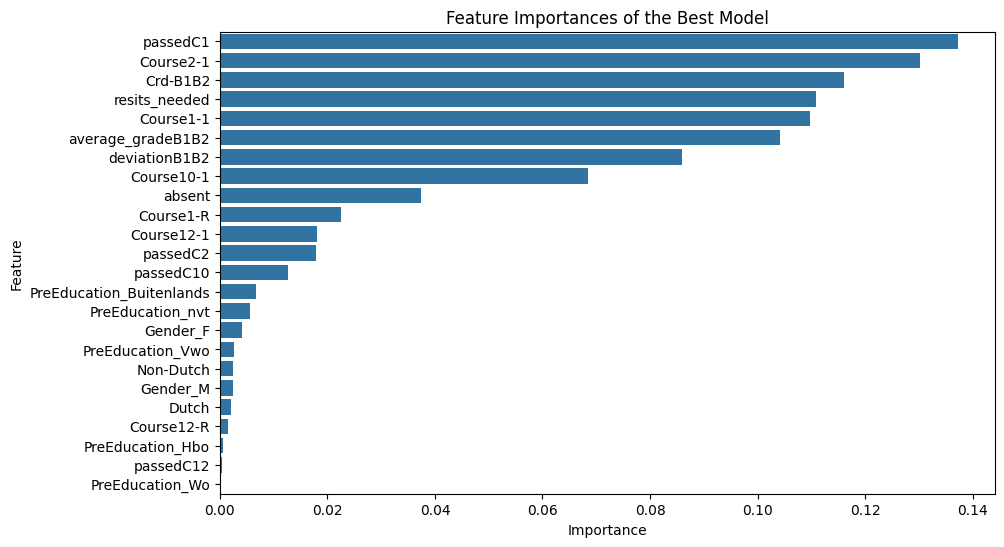

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_best)
plt.title('Feature Importances of the Best Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [39]:
correlation_matrix = X_train.corr()

print(correlation_matrix)

                          Course1-1  Course12-1  Course2-1  Course10-1  \
Course1-1                  1.000000    0.583828   0.784785    0.747614   
Course12-1                 0.583828    1.000000   0.528504    0.583025   
Course2-1                  0.784785    0.528504   1.000000    0.768405   
Course10-1                 0.747614    0.583025   0.768405    1.000000   
Course12-R                -0.138167   -0.326727  -0.163349   -0.142225   
Course1-R                 -0.206504    0.135277   0.024167    0.084528   
Crd-B1B2                   0.824030    0.602599   0.830786    0.828172   
passedC1                   0.773438    0.428409   0.698668    0.664525   
passedC12                  0.429933    0.829875   0.337811    0.393928   
passedC10                  0.611414    0.307704   0.755932    0.543507   
passedC2                   0.611414    0.307704   0.755932    0.543507   
resits_needed             -0.855773   -0.619361  -0.814420   -0.809485   
absent                    -0.624758   

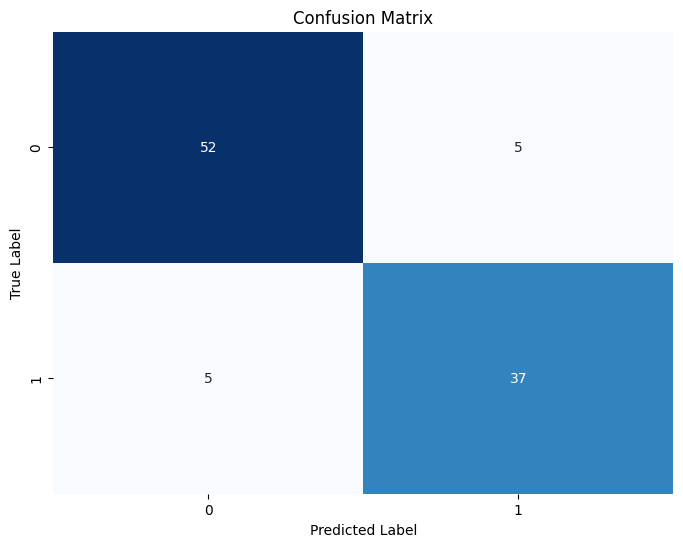

In [40]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
